# Jeff Pinegar
jeffPinegar1@gmail.com <br>
717-982-0516<br>
## Challenge 21 - Deep learning - Nonprofit Foundation Alphabet Soup <br>

Due: March 6, 2023<br>

---

<u>**Summary:**</u><br>
With limited success with deep learning, I attempted to solve the problme using Supervised RandomForest.  The data prep is the same as "JSP DeepLearningChallenge_008.ipynb".  The results are no better or worse then the deep learning neural network.

<u>**Scalling:**</u><br>
All values we standardized (Z-Score)

<u>**Variables dropped from the model:**</u><br>
* EIN
* Name
* STATUS
* SPECIAL_CONSIDERATIONS

<u>**Binning:**</u><br>
* APPLICATION_TYPE
* CLASSIFICATION

<u>**Special Freatures:**</u><br>
* The number of estimators was varied from 100 to 1000. 
* The SelectFromModel threshold was adjusted to optimize the results. A bar chart plot of features was a aid for this investigation.

---

In [27]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np




---
## Preprocess the Data (Step 1)

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, you’ll need to preprocess the dataset. This step prepares you for Step 2, where you'll compile, train, and evaluate the neural network model.

Using the information we have provided in the starter code, follow the instructions to complete the preprocessing steps.

1. Read in the charity_data.csv to a Pandas DataFrame, and be sure to identify the following in your dataset:
    * What variable(s) are the target(s) for your model?
    * What variable(s) are the feature(s) for your model? <br><br>
    

2. Drop the `EIN` and `NAME` columns.

3. Determine the number of unique values for each column.

4. For columns that have more than 10 unique values, determine the number of data points for each unique value.

5. Use the number of data points for each unique value to pick a cutoff point to bin "rare" categorical variables together in a new value, `Other`, and then check if the binning was successful.

6. Use `pd.get_dummies()` to encode categorical variables.

In [2]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("./Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop duplicates if they exist (Do this before dropping Nane and EIN)
application_df.drop_duplicates(inplace=True)

# Drop records with na
application_df.dropna(how='any', inplace=True)

In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
X = application_df.drop(['EIN', 'NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'], axis=1)

In [5]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
X.describe(include = 'all').round(3)

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,ASK_AMT,IS_SUCCESSFUL
count,34299,34299,34299,34299,34299,34299,3.429900e+04,34299.000
unique,17,6,71,5,4,9,NaN,NaN
top,T3,Independent,C1000,Preservation,Trust,0,NaN,NaN
freq,27037,18480,17326,28095,23515,24388,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.769199e+06,0.532
std,NaN,NaN,NaN,NaN,NaN,NaN,8.713045e+07,0.499
min,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+03,0.000
25%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+03,0.000
50%,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+03,1.000
75%,NaN,NaN,NaN,NaN,NaN,NaN,7.742000e+03,1.000


### Reduce APPLICATION_TYPE

In [6]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
X['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
Cutoff = 500
a = X['APPLICATION_TYPE'].value_counts()
application_types_to_replace = a[a < Cutoff].index.tolist()

# Replace in dataframe
for app in application_types_to_replace:
    X['APPLICATION_TYPE'] = X['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
X['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

### Reduce CLASSIFICATION

In [8]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
X['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [9]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
b = X['CLASSIFICATION'].value_counts()
b[b>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

<AxesSubplot: >

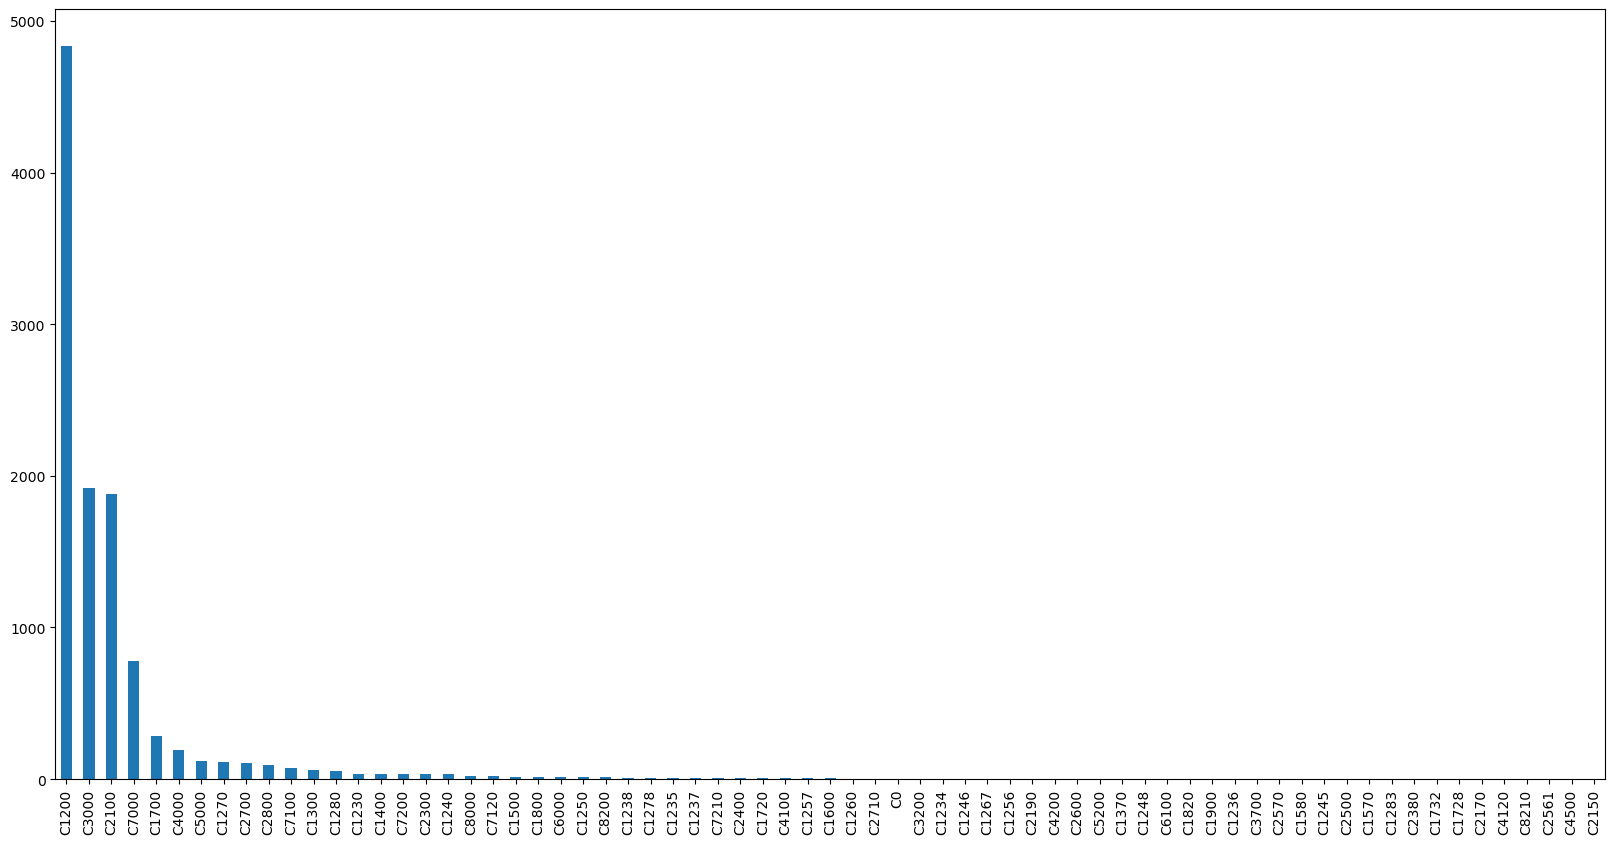

In [10]:
# plot the Classifications to have a closser look at the distribution
b = X['CLASSIFICATION'].value_counts()

# leave off the top two values so the graph is more useful for the intended purpose (further lowering the cutoff)
c = b[b<6000]
c.plot(kind="bar", figsize=(20,10))

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classCutoff = 1000
b = X['CLASSIFICATION'].value_counts()
classifications_to_replace = b[b < classCutoff].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    X['CLASSIFICATION'] = X['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
X['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Look at INCOME_AMT value counts for potential binning
b = X['INCOME_AMT'].value_counts()
b

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

## Scale the ASK_AMT

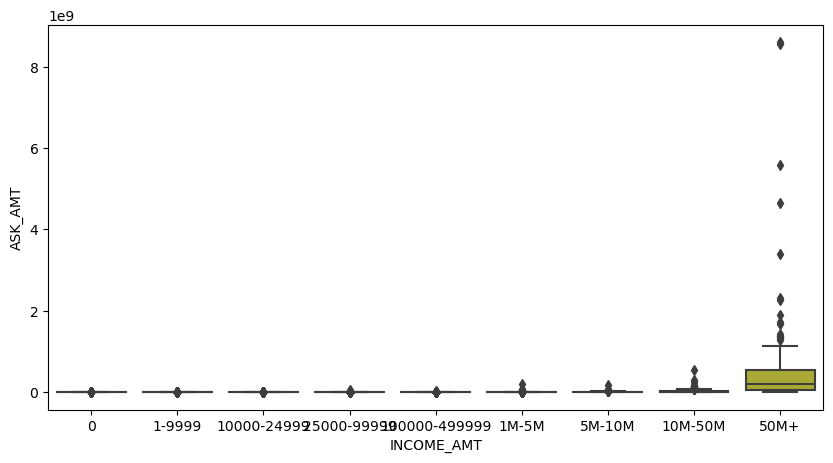

In [13]:
plt.rcParams["figure.figsize"] = [10, 5]
sns.boxplot( x=X['INCOME_AMT']
      , y=X['ASK_AMT']
      , order = ('0', '1-9999', '10000-24999', '25000-99999', '100000-499999', '1M-5M', '5M-10M', '10M-50M', '50M+'))
# plt.ylim(0, 20000000)
plt.show()

In [14]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
X_dummies = pd.get_dummies(X)
print(X_dummies.columns)
X_dummies

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,108590,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5000,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,6692,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,142590,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34295,5000,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34296,5000,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
34297,5000,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
X_dummies.describe(include = 'all').round(3)

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
count,3.429900e+04,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,...,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000
mean,2.769199e+06,0.532,0.008,0.015,0.031,0.788,0.045,0.034,0.035,0.021,...,0.686,0.711,0.021,0.016,0.098,0.007,0.028,0.109,0.004,0.005
std,8.713045e+07,0.499,0.089,0.123,0.173,0.409,0.207,0.182,0.185,0.144,...,0.464,0.453,0.144,0.125,0.298,0.083,0.165,0.312,0.064,0.073
min,5.000000e+03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5.000000e+03,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,5.000000e+03,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,7.742000e+03,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,...,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,8.597806e+09,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


<AxesSubplot: >

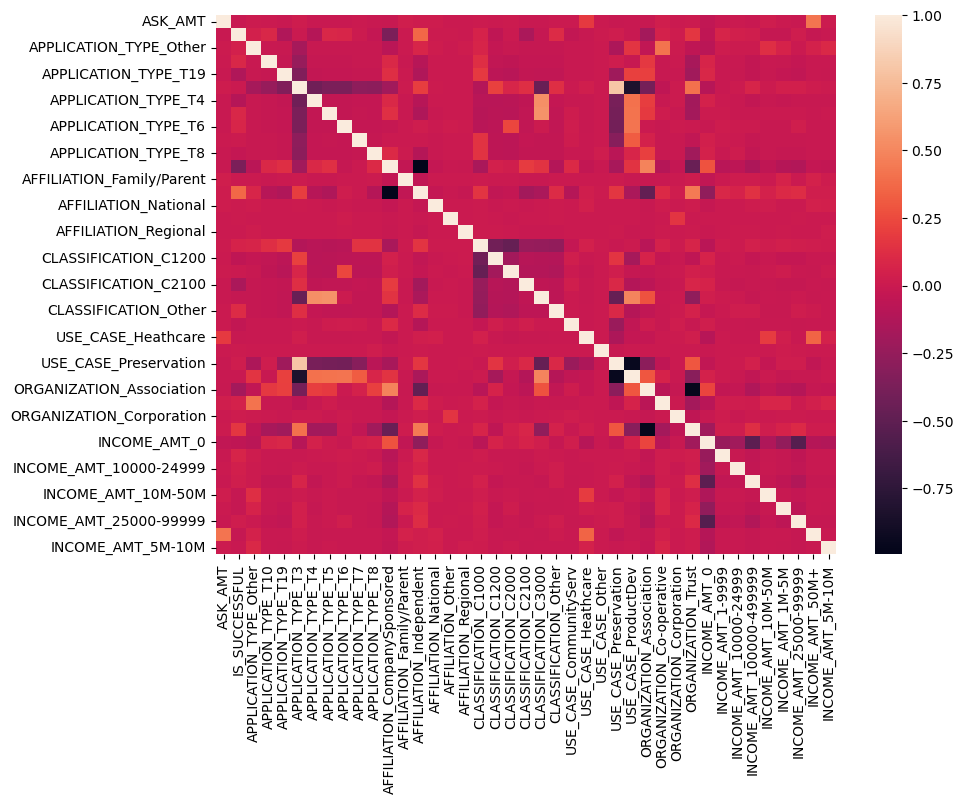

In [16]:
# looking to see if there are any variable that are highly correlated that may be preventing a more accurate model 
plt.figure(figsize=(10,7))
c= X_dummies.corr()
sns.heatmap(c)

# The correlation heat map below indicates the variables are not well separated.  

In [17]:
# Seperate out the dependent and independen variables
# Split our preprocessed data into our features and target arrays

# this is the target
y = X_dummies["IS_SUCCESSFUL"].values

# Drop y out of the dataframe to get the independent variables
# this is the feature list
X = X_dummies.drop("IS_SUCCESSFUL", axis=1)
independent_variables = X.columns
X.head()


,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,108590,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,5000,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,6692,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,142590,0,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [18]:
X.describe(include = 'all').round(3)

,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
count,3.429900e+04,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,...,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000,34299.000
mean,2.769199e+06,0.008,0.015,0.031,0.788,0.045,0.034,0.035,0.021,0.021,...,0.686,0.711,0.021,0.016,0.098,0.007,0.028,0.109,0.004,0.005
std,8.713045e+07,0.089,0.123,0.173,0.409,0.207,0.182,0.185,0.144,0.145,...,0.464,0.453,0.144,0.125,0.298,0.083,0.165,0.312,0.064,0.073
min,5.000000e+03,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,5.000000e+03,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,5.000000e+03,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,7.742000e+03,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,...,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
max,8.597806e+09,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [19]:
# Split the preprocessed data into a training and testing dataset
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [20]:
# Standard Scaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# there was only one value that needed Scaling ASK_AMT
# Therefore I scaled that variable earlier in the code so the whole data set could be exported for testing in other code.

# I Copied the dataframes to the the "standard names" so that "cut and Paste code would work"
# X_train_scaled = X_train
# X_test_scaled = X_test

In [22]:
clf = RandomForestClassifier(random_state=1, n_estimators=1000).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.8156974032032344
Testing Score: 0.7137026239067056


[4.00642193e-01 2.04268931e-03 2.45089066e-02 1.75505213e-02
 1.45904345e-02 1.79854175e-02 2.95549983e-02 1.26125055e-02
 4.22971561e-03 4.45126423e-03 1.35001045e-01 1.21898192e-03
 1.22670808e-01 6.65668170e-04 6.95303968e-05 2.71620118e-04
 1.32182972e-02 8.85258445e-03 1.78757209e-02 1.90270983e-02
 8.12870569e-03 1.88162515e-02 3.39820547e-03 1.40489212e-03
 6.88277719e-05 1.01748281e-02 1.19717354e-02 2.62582354e-02
 2.77831159e-03 5.30627010e-04 2.13936167e-02 9.55713509e-03
 6.32921403e-03 3.57898507e-03 6.24983543e-03 3.11023025e-03
 7.07767277e-03 7.52490573e-03 2.21760749e-03 2.39017718e-03]


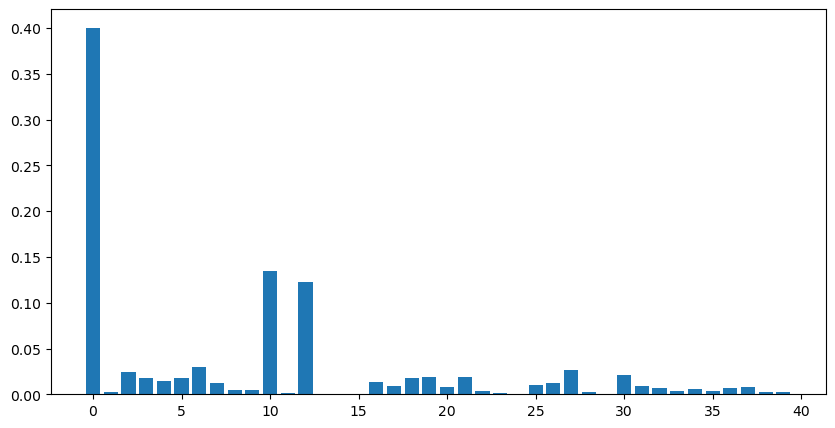

In [23]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [24]:
from sklearn.feature_selection import SelectFromModel
# sel is the data the model feels are important.
sel = SelectFromModel(clf, threshold = 0.0175)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([ True, False,  True,  True, False,  True,  True, False, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True, False,  True, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False])

In [25]:
# use the selected independent variables (sel)
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

c:\Users\jspinega\Anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [35]:
# this is using the full set of data
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.5358420152386876
Testing Score: 0.5281632653061225


In [38]:
# Now repeat the process using the selected variables (features)
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.7131472554812627
Testing Score: 0.7173177842565598


In [42]:
from sklearn.metrics import confusion_matrix, classification_report
# continue the evaluation of the model
y_true = y_test

# Predict  - using the model calculate results for the text data
y_pred = clf.predict(X_selected_test_scaled)

# create and evaluate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
print(f"True positives (TP): {tp}")
print(f"True negatives (TN): {tn}")
print(f"False positives (FP): {fp}")
print(f"False negatives (FN): {fn}")
precision = tp / (tp + fp)
print(f'precision =  {precision}')
accuracy = (tp + tn)/(tp+tn+fp+fn)
print(f'accuracy =  {accuracy}')
sensitivity = tp / (tp + fn)
print(f'sensitivity =  {sensitivity}')
F1_j = 2*tp/(2*tp+fn+fp)
print(f'F1 = {F1_j}')
print(classification_report(y_true, y_pred))

True positives (TP): 3588
True negatives (TN): 2563
False positives (FP): 1474
False negatives (FN): 950
precision =  0.7088107467404188
accuracy =  0.7173177842565598
sensitivity =  0.7906566769501984
F1 = 0.7475
              precision    recall  f1-score   support

           0       0.73      0.63      0.68      4037
           1       0.71      0.79      0.75      4538

    accuracy                           0.72      8575
   macro avg       0.72      0.71      0.71      8575
weighted avg       0.72      0.72      0.72      8575

